<a href="https://colab.research.google.com/github/keshav123333/Machine_learning_100_campusx/blob/main/What_to_do_FirstWithData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

follow the step

In [2]:
url="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
import pandas as pd
df=pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
738,739,0,3,"Ivanoff, Mr. Kanio",male,NaN,0,0,349201,7.8958,NaN,S
574,575,0,3,"Rush, Mr. Alfred George John",male,16.0,0,0,A/4. 20589,8.0500,NaN,S
722,723,0,2,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,S
764,765,0,3,"Eklund, Mr. Hans Linus",male,16.0,0,0,347074,7.7750,NaN,S
753,754,0,3,"Jonkoff, Mr. Lalio",male,23.0,0,0,349204,7.8958,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


kuch dagta float m like age float m jo int m hona chaiye space bachega

In [5]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Are duplicate vlaues there

In [7]:
df.duplicated().sum()
#if there duplicate row remove it
df=df.drop_duplicates()

# corrr()

<Axes: >

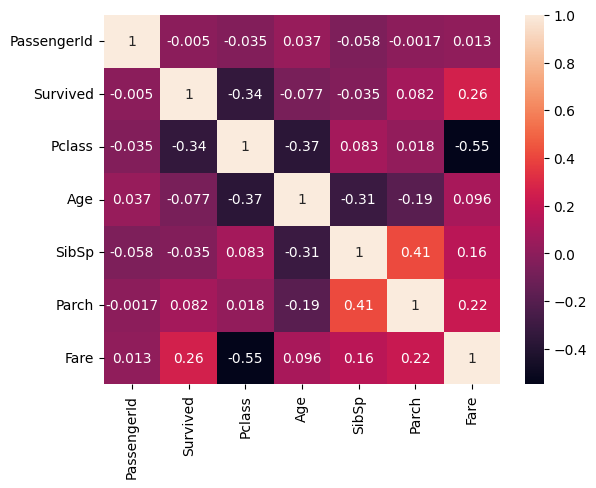

In [8]:
import seaborn as sns
sns.heatmap(df.select_dtypes(include=["number"]).corr(),annot=True)

In [9]:
dfd=df.select_dtypes(include=["number"]).corr()
dfd[(dfd>0)&(dfd<1)]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,NaN,NaN,NaN,0.036847,NaN,NaN,0.012658
Survived,NaN,NaN,NaN,NaN,NaN,0.081629,0.257307
Pclass,NaN,NaN,NaN,NaN,0.083081,0.018443,NaN
Age,0.036847,NaN,NaN,NaN,NaN,NaN,0.096067
SibSp,NaN,NaN,0.083081,NaN,NaN,0.414838,0.159651
Parch,NaN,0.081629,0.018443,NaN,0.414838,NaN,0.216225
Fare,0.012658,0.257307,NaN,0.096067,0.159651,0.216225,NaN


second way to do slection in corr

In [10]:
import numpy as np

masked=dfd.where(np.triu(np.ones(dfd.shape),k=1).astype(bool))
masked.stack()[masked.stack()>0]

PassengerId  Age      0.036847
             Fare     0.012658
Survived     Parch    0.081629
             Fare     0.257307
Pclass       SibSp    0.083081
             Parch    0.018443
Age          Fare     0.096067
SibSp        Parch    0.414838
             Fare     0.159651
Parch        Fare     0.216225
dtype: float64

catgorical data pe if jana ki har category kitni baar aayi toh sns countplot use kar le

In [11]:
df['Survived'].unique()

array([0, 1])

<Axes: xlabel='Pclass', ylabel='count'>

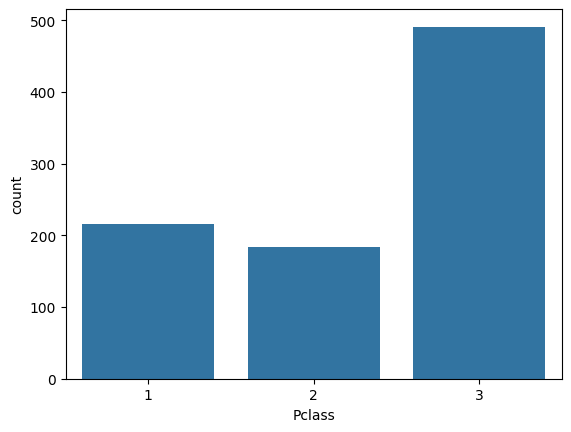

In [12]:
#sns.countplot(x='Survived', data=df)
sns.countplot(x='Pclass', data=df)

piechart bana sakta

<Axes: ylabel='count'>

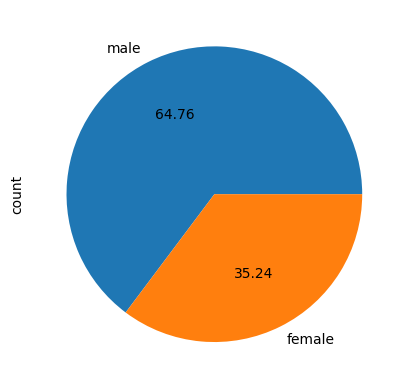

In [13]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

Numerical data  pe kya karwa sakte ho eda

Histogram

In [14]:
import matplotlib.pyplot as plt


(array([ 64., 115., 230., 155.,  86.,  42.,  17.,   5.]),
 array([ 0.42  , 10.3675, 20.315 , 30.2625, 40.21  , 50.1575, 60.105 ,
        70.0525, 80.    ]),
 <BarContainer object of 8 artists>)

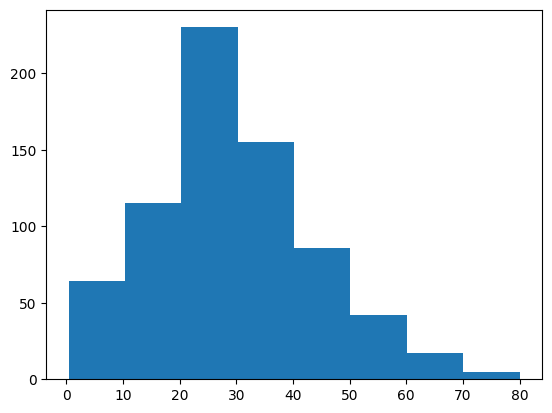

In [15]:
#df['Age'].plot(kind='hist')
plt.hist(df['Age'],bins=8) #both is same

Distplot

/tmp/ipython-input-3155673726.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age']) #yaha percentage mil jaati ki koi banda 40 ka toh kuitne percent data m 40 ke


<Axes: xlabel='Age', ylabel='Density'>

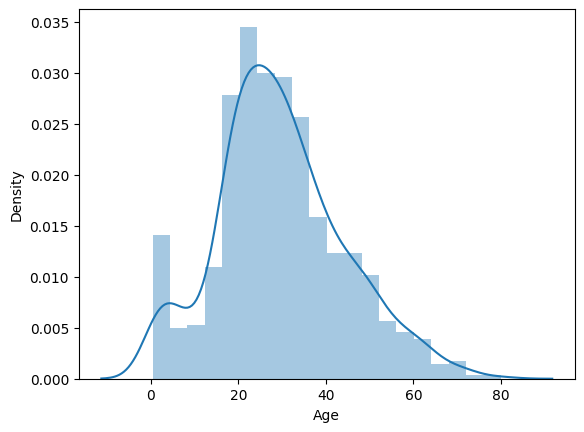

In [16]:
sns.distplot(df['Age']) #yaha percentage mil jaati ki koi banda 40 ka toh kuitne percent data m 40 ke

Boxplot help jitna data bahar ki taraf vo dikha deta hai and like help ki outlier ye ek min max clculate karta already data ke hisab se

<Axes: ylabel='Age'>

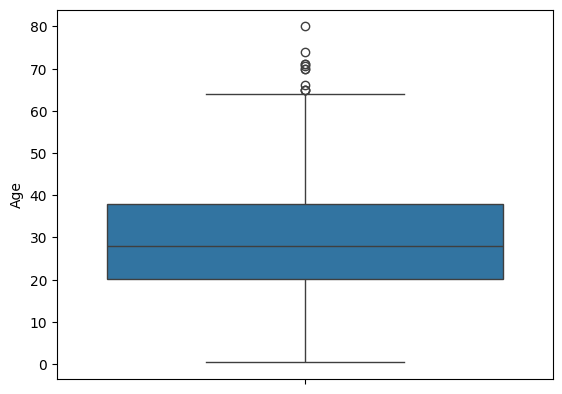

In [17]:
sns.boxplot(df['Age'])

In [18]:
df['Age'].skew()  # isme skew ness ka hisab lagta hai ki if 0 toh proper skew if postive toh +skew and -skew toh

np.float64(0.38910778230082704)

In [19]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


scatter plot numerical-numerical

<Axes: ylabel='total_bill'>

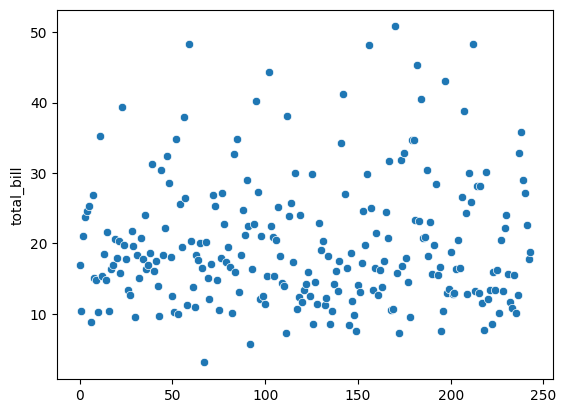

In [20]:
sns.scatterplot(tips['total_bill'])

<Axes: xlabel='total_bill', ylabel='tip'>

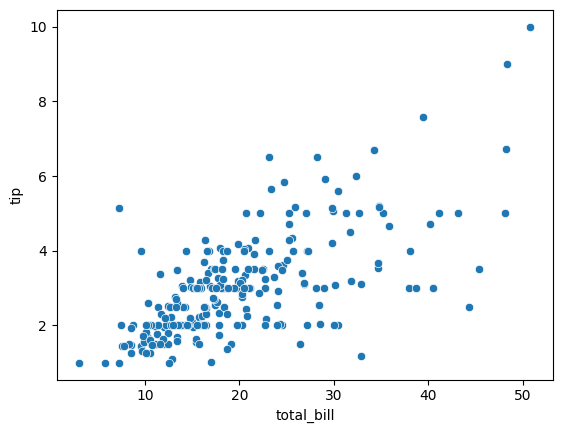

In [21]:
sns.scatterplot(x=tips['total_bill'] ,y=tips['tip'])

scatter plot for 3d analysis

<Axes: xlabel='total_bill', ylabel='tip'>

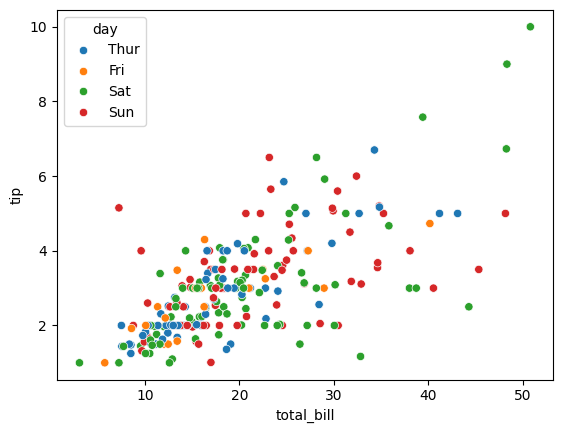

In [22]:
sns.scatterplot(x=tips['total_bill'] ,y=tips['tip'],hue=tips['day']) #hue m age bhi bhej sakta tu

<Axes: xlabel='total_bill', ylabel='tip'>

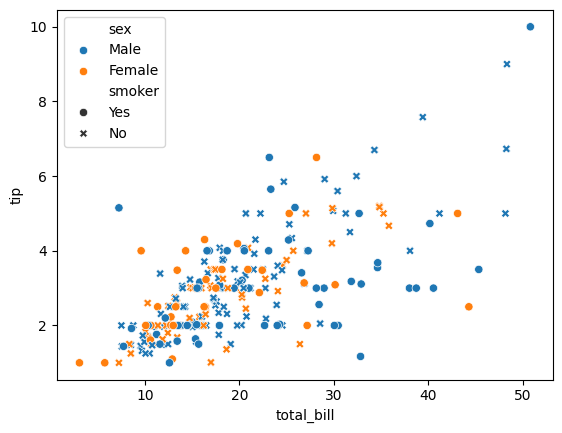

In [23]:
sns.scatterplot(x=tips['total_bill'] ,y=tips['tip'],hue=tips['sex'],style=tips['smoker']) #4d m bhi male female m smoker and non smoker ka bhi relation nikal sakte

barplot ek numerical and dusri catgorical mean yes no yah thusday monday friday aise

<Axes: xlabel='sex', ylabel='total_bill'>

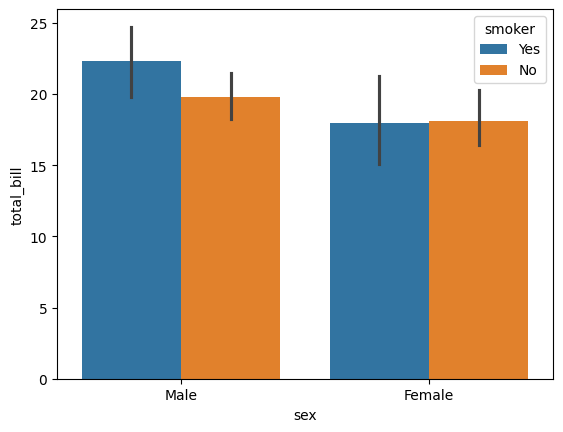

In [24]:
sns.barplot(x=tips['sex'],y=tips['total_bill'],hue=tips['smoker'])

boxplot for 2 dim maan le tips and sex ke bich reln

<Axes: xlabel='sex', ylabel='tip'>

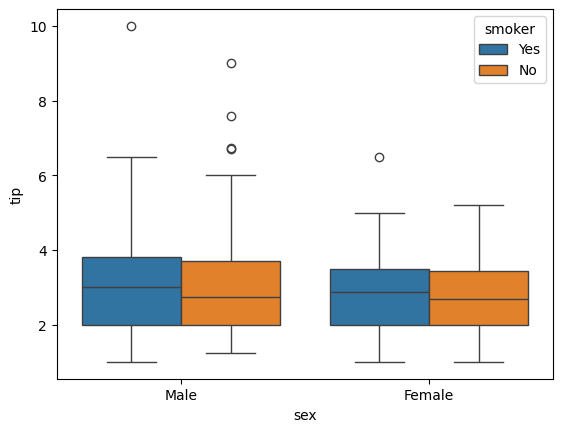

In [25]:
sns.boxplot(y=tips['tip'],x=tips['sex'],hue=tips['smoker'])

distplot numerical categorical

In [26]:
titanic=sns.load_dataset('titanic')

/tmp/ipython-input-155812297.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['survived']==0]['age'])#,hist=False kar sakta hai tu
/tmp/ipython-input-155812297.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['survived']==1]['age'])


<Axes: xlabel='age', ylabel='Density'>

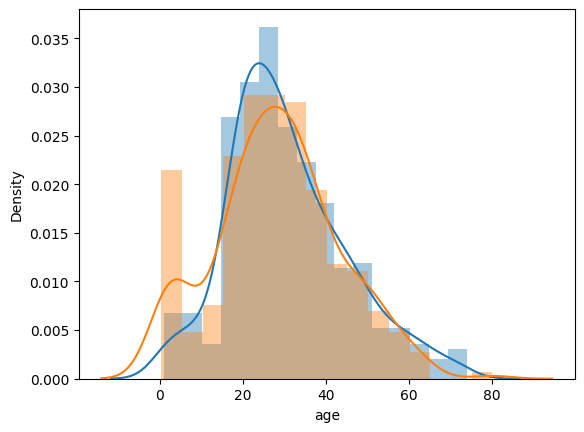

In [27]:
sns.distplot(titanic[titanic['survived']==0]['age'])#,hist=False kar sakta hai tu
sns.distplot(titanic[titanic['survived']==1]['age'])

heatmap categorical -categorical

In [28]:
pd.crosstab(titanic['pclass'],titanic['survived'])

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='survived', ylabel='pclass'>

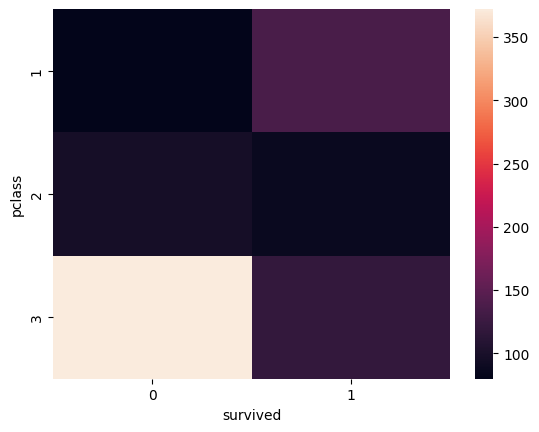

In [29]:
sns.heatmap(pd.crosstab(titanic['pclass'],titanic['survived']))

In [30]:
titanic.groupby('pclass')['survived'].mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='pclass'>

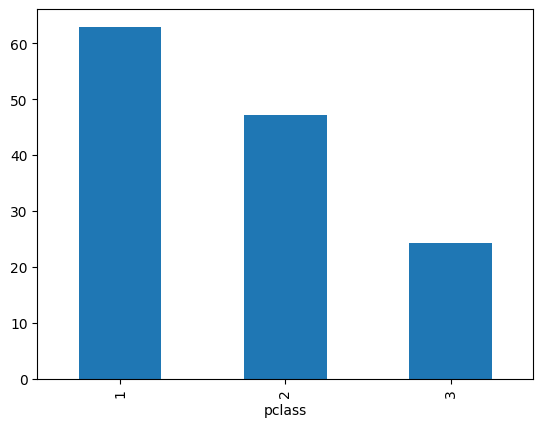

In [31]:
(titanic.groupby('pclass')['survived'].mean()*100).plot(kind='bar')

In [32]:

titanic.groupby('survived')['age'].mean()

,age
survived,
0,30.626179
1,28.343690


In [33]:
(titanic.groupby('sex')['survived'].mean())

,survived
sex,
female,0.742038
male,0.188908


cluster map categorical like 0 1 2 aise with categorical kareln like jo jayda ralted vo pas pas and jo kam related vo durse region m

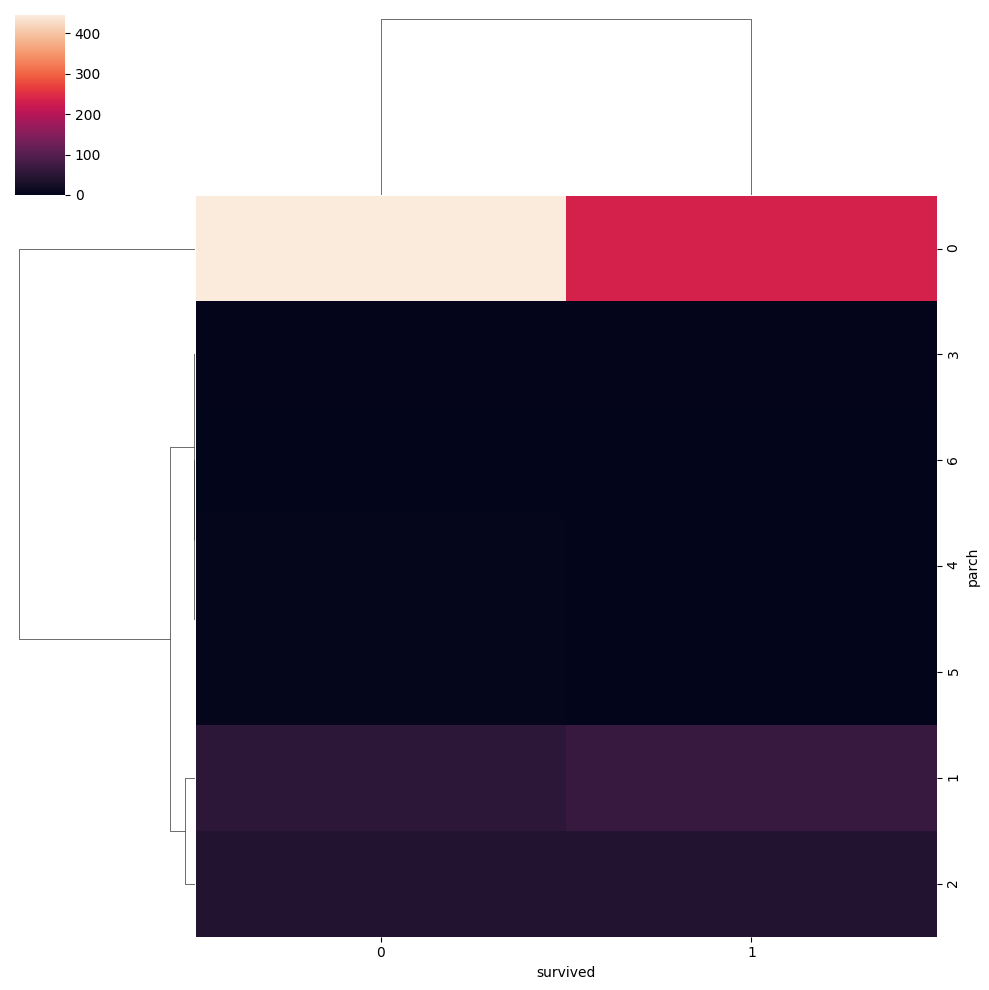

In [34]:
sns.clustermap(pd.crosstab(titanic['parch'],titanic['survived']))

pairplot

In [35]:
iris=sns.load_dataset('iris')

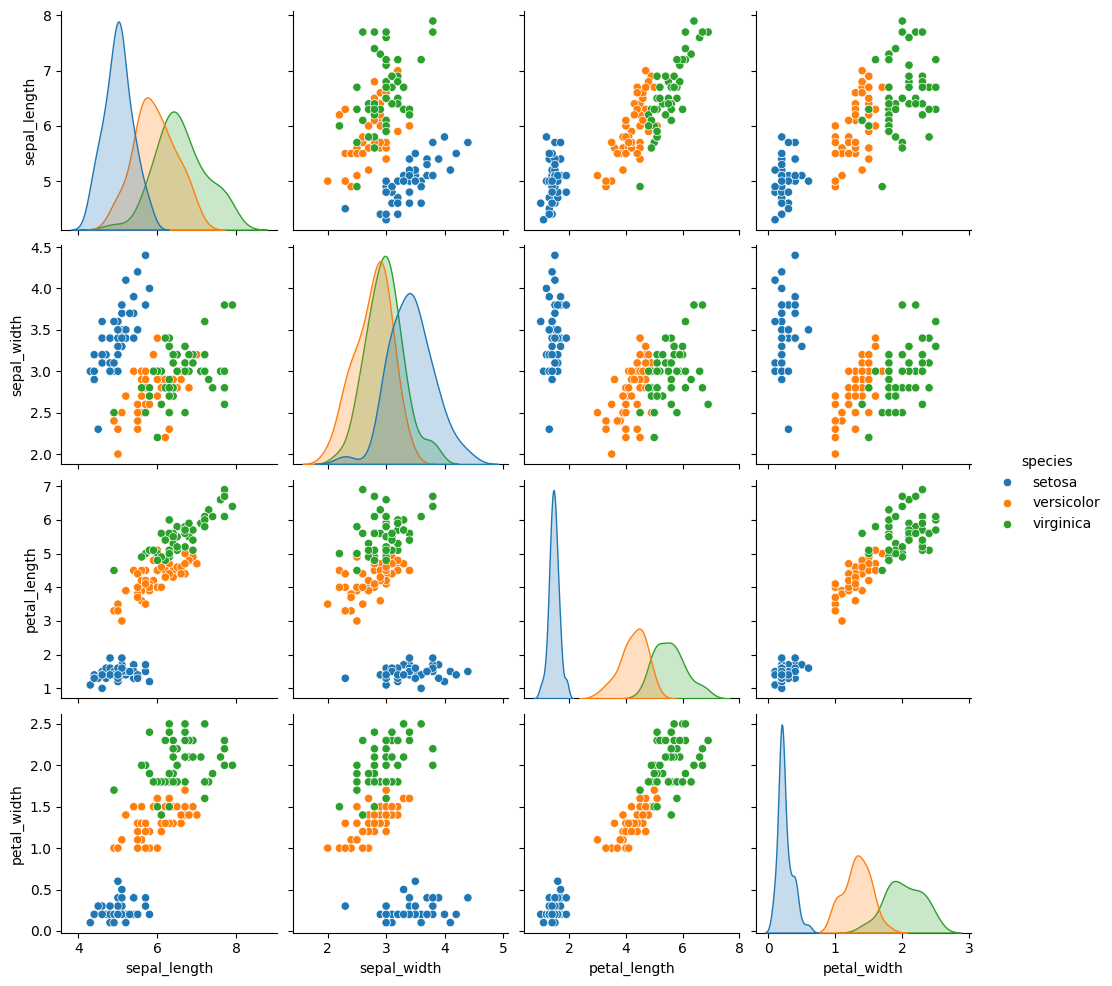

In [36]:
sns.pairplot(iris,hue='species')

lineplot numerical -numerical   ye zaydatar time ke sath kitne covid cases baded aise type m

In [37]:
flight=sns.load_dataset('flights')

In [38]:
newdf=flight.groupby('year')['passengers'].sum().reset_index()

In [39]:
newdf

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


<Axes: xlabel='year', ylabel='passengers'>

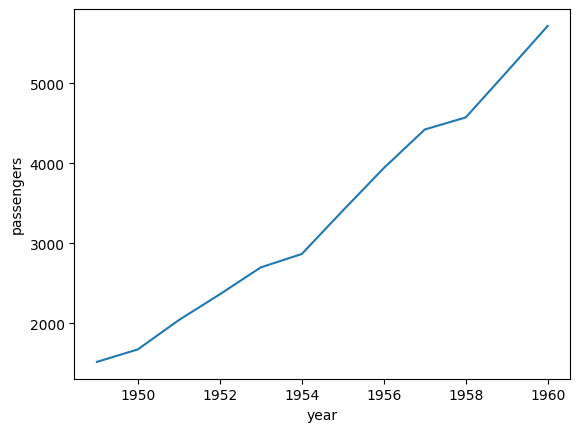

In [40]:
sns.lineplot(x='year',y='passengers',data=newdf)

pivot table heatmap

In [41]:
flight.pivot_table(values='passengers',index='month',columns='year',observed=True)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


so aage halka ho raha matlb aur customer travel kar rahe hai year badta aa raha ans ummer ke time june jul ke time bahut log travel kar rahe  

<Axes: xlabel='year', ylabel='month'>

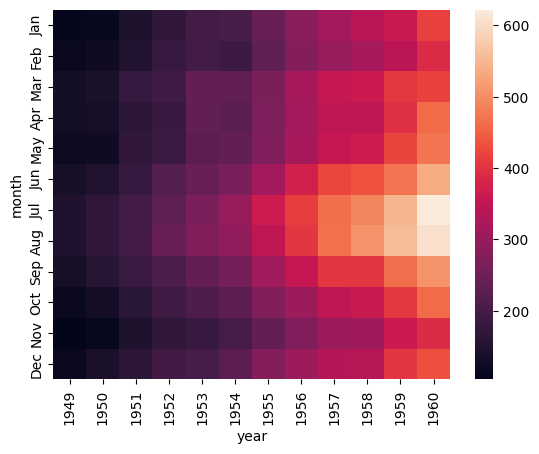

In [42]:
sns.heatmap(flight.pivot_table(values='passengers',index='month',columns='year',observed=True))

cluster map se kaun kauns si ceez ek jaise behave vo dekh sata

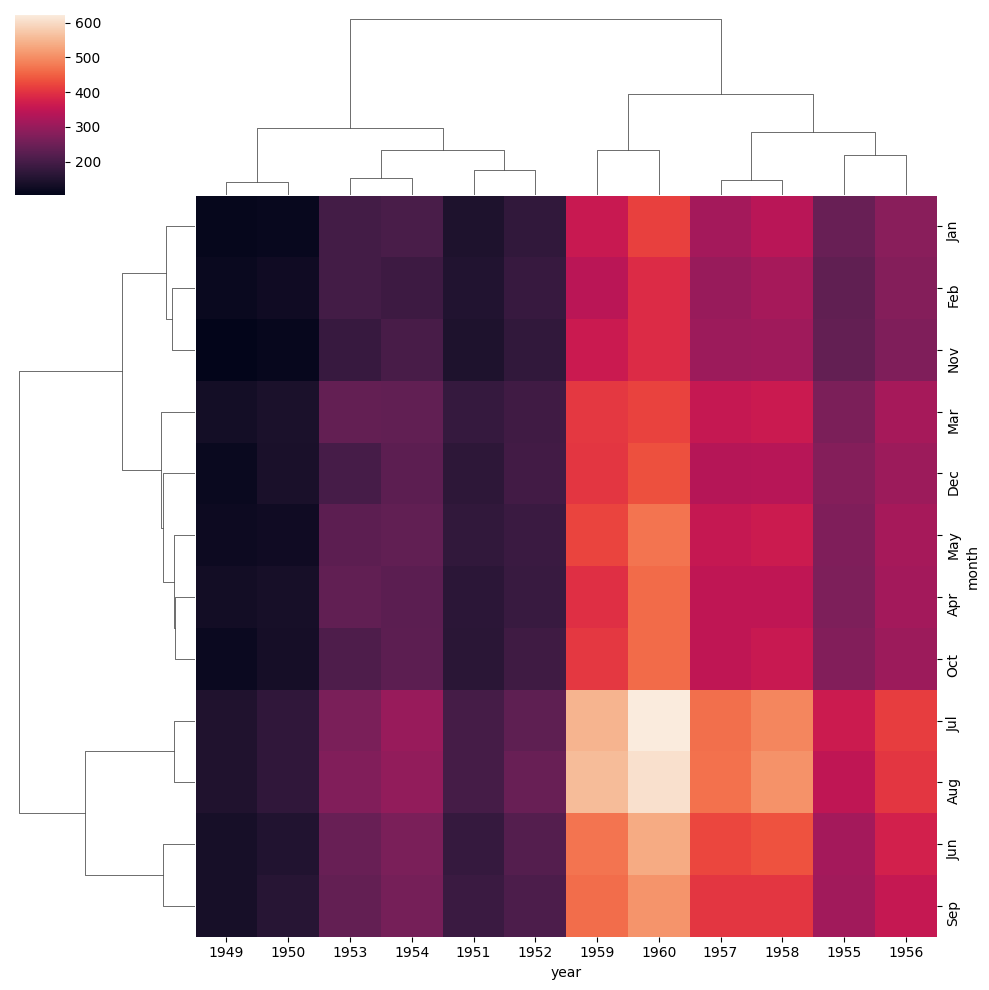

In [43]:
sns.clustermap(flight.pivot_table(values='passengers',index='month',columns='year',observed=True))

ye nikala maine kis month m year wise sabse jayda log travel

In [44]:
idx=flight.groupby('year')['passengers'].idxmax()
result = flight.loc[idx, ['year', 'month', 'passengers']]
result

,year,month,passengers
6,1949,Jul,148
18,1950,Jul,170
30,1951,Jul,199
43,1952,Aug,242
55,1953,Aug,272
66,1954,Jul,302
78,1955,Jul,364
90,1956,Jul,413
103,1957,Aug,467
115,1958,Aug,505


panda profiler bahut help karta ye

In [45]:
!pip install ydata-profiling

In [46]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 59.10it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]